<a href="https://colab.research.google.com/github/rmahesh6386/Tata-Motors-Project-/blob/main/TATA_Motors_Stock_market_Forecasting_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction of TATA Motors Pvt Ltd

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market of a technology giant like TATA motors. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history.
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [43]:
import pandas as pd
#df=pd.read_csv("TATAMOTORS.csv")
#df

In [44]:
#stock Company for analytics
stock = ['TATAMOTORS.NS']
data_source = 'yahoo' 

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

# Set DataFrame as the Stock Ticker
TM = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [45]:
TM=TM.dropna()

In [46]:
TM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-16,234.979614,235.771118,226.174057,226.817154,220.263367,8741929
2012-07-17,229.439041,229.884262,222.859604,223.502716,217.044678,12015166
2012-07-18,221.375519,221.523941,216.082306,219.248337,216.751236,11897419
2012-07-19,222.117569,224.096344,221.424988,222.414383,219.881226,6677436
2012-07-20,221.622879,223.057480,219.693573,221.029236,218.511856,3940979
...,...,...,...,...,...,...
2022-07-11,438.049988,441.200012,433.450012,437.049988,437.049988,12619654
2022-07-12,433.000000,435.000000,428.149994,430.549988,430.549988,9518822
2022-07-13,432.700012,435.850006,425.649994,427.100006,427.100006,10181698


In [47]:
Tatamotors = TM['Close']

In [48]:
Tatamotors

Date
2012-07-16    226.817154
2012-07-17    223.502716
2012-07-18    219.248337
2012-07-19    222.414383
2012-07-20    221.029236
                 ...    
2022-07-11    437.049988
2022-07-12    430.549988
2022-07-13    427.100006
2022-07-14    428.049988
2022-07-15    440.200012
Name: Close, Length: 2465, dtype: float64

In [49]:
Tatamotors.describe()

count    2465.000000
mean      337.936979
std       129.436223
min        65.300003
25%       251.300003
50%       345.649994
75%       440.350006
max       598.134399
Name: Close, dtype: float64

In [50]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.line(Tatamotors, y="Close", title='Tatamotors closing price')
fig.show()

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

**ADF (Augmented Dickey-Fuller) Test**

Null Hypothesis: The series has a unit root (value of a =1)


Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [77]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(Tatamotors)     

ADF Statistic: -1.632629
p-value: 0.466115
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Non-stationary


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.


In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

<Figure size 432x288 with 0 Axes>

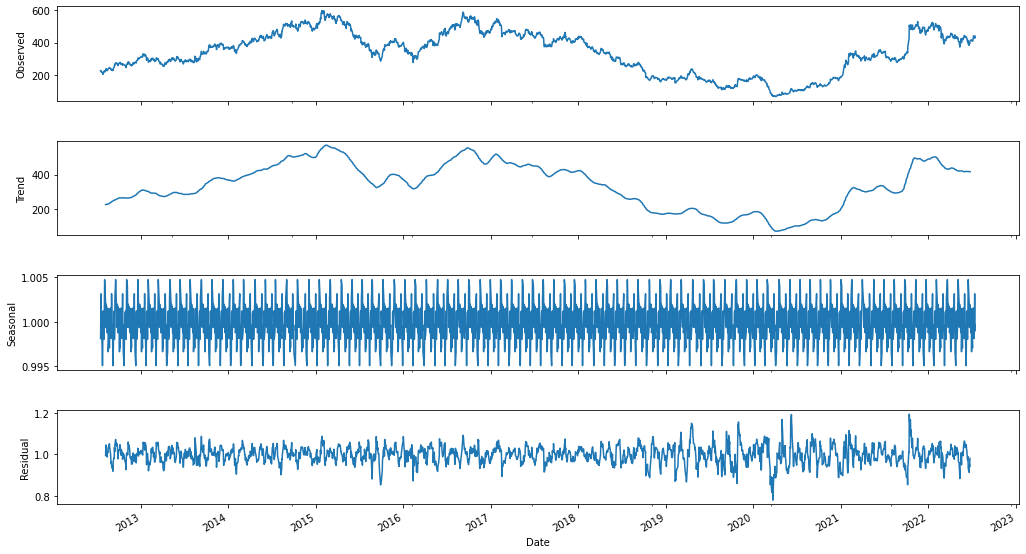

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Tatamotors, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

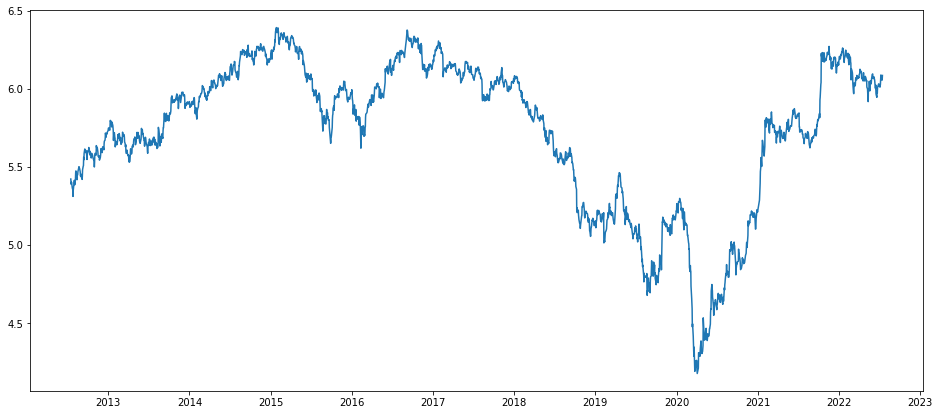

In [53]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)

#USING LOG TRANSFORM
import numpy as np
ts_log=np.log(Tatamotors)
plt.plot(ts_log)

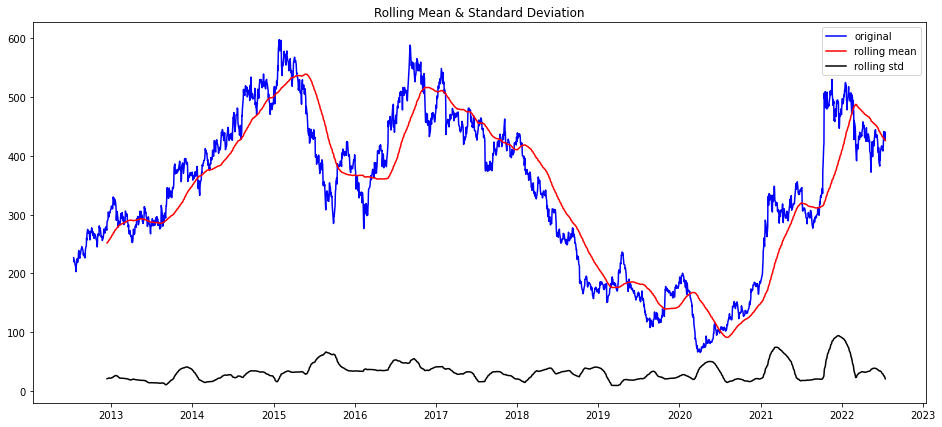

In [54]:
rollmean=Tatamotors.rolling(100).mean()
rollstd=Tatamotors.rolling(100).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(Tatamotors,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

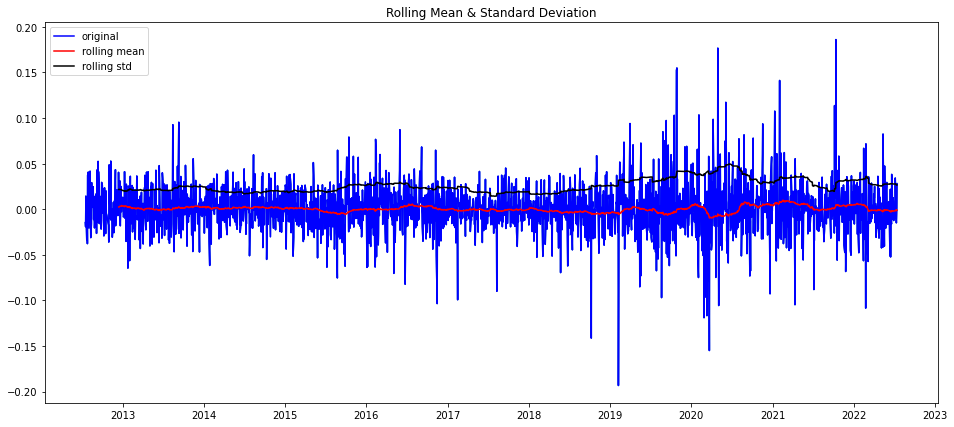

In [68]:
#Lets try Differencing
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift(periods=1, axis = 0)
plt.plot(ts_log_diff)

#Determining rolling statistics
rollmean = ts_log_diff.rolling(100).mean()
rollstd = ts_log_diff.rolling(100).std()

#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [56]:
Tatamotors.sort_index(inplace=True)

In [57]:
Tatamotors

Date
2012-07-16    226.817154
2012-07-17    223.502716
2012-07-18    219.248337
2012-07-19    222.414383
2012-07-20    221.029236
                 ...    
2022-07-11    437.049988
2022-07-12    430.549988
2022-07-13    427.100006
2022-07-14    428.049988
2022-07-15    440.200012
Name: Close, Length: 2465, dtype: float64

In [58]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



ValueError: ignored

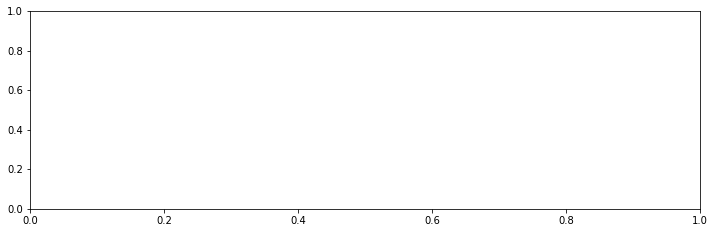

In [74]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(lag_acf,lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(lag_pacf,lags=40,ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



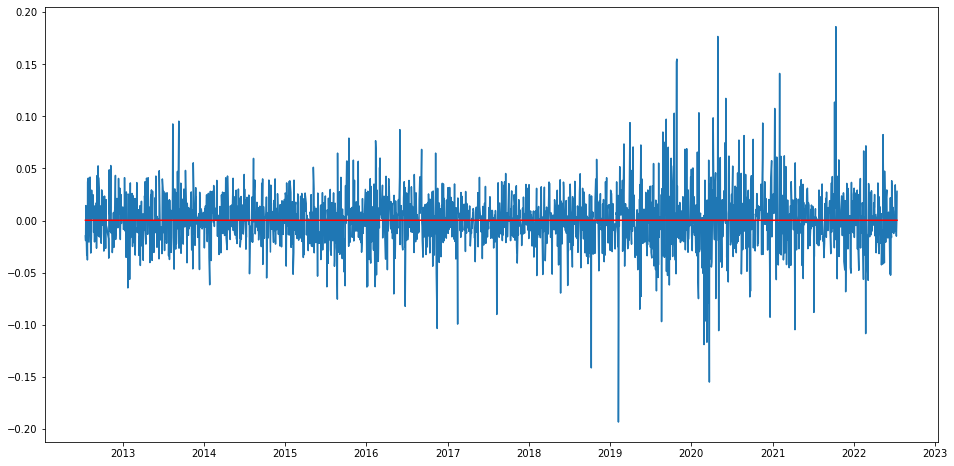

In [60]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [61]:
#Taking fitted values in Series
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2012-07-17    0.000269
2012-07-18    0.000269
2012-07-19    0.000269
2012-07-20    0.000269
2012-07-23    0.000269
dtype: float64


In [62]:
#Taking cumulative sum since we have differenced the timeseries
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2012-07-17    0.000269
2012-07-18    0.000538
2012-07-19    0.000807
2012-07-20    0.001076
2012-07-23    0.001346
dtype: float64


In [63]:
ARIMA_log_prediction=pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2012-07-16    5.424144
2012-07-17    5.424413
2012-07-18    5.424682
2012-07-19    5.424952
2012-07-20    5.425221
dtype: float64

Text(0.5, 1.0, 'RMSE: 159.4656')

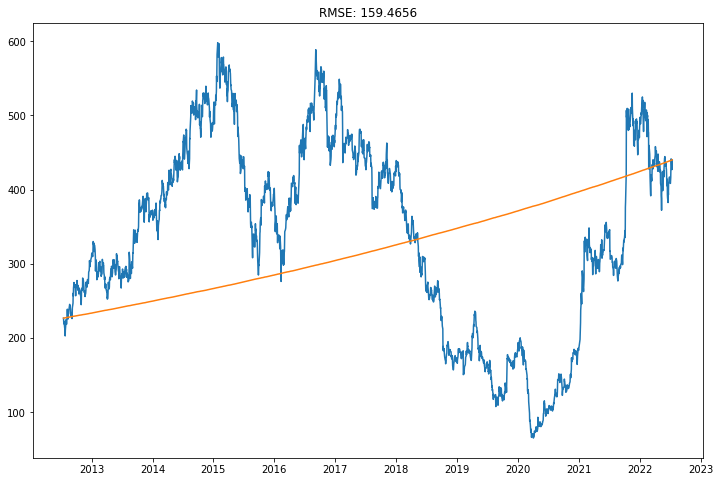

In [64]:
plt.figure(figsize=(12,8))
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(Tatamotors)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Tatamotors)**2)/len(Tatamotors)))